## Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
    


## Read Data

In [ ]:

train_dir = r"D:\Cellula Technologies\Project 1\Python\Teeth_Dataset\Training"
test_dir = r"D:\Cellula Technologies\Project 1\Python\Teeth_Dataset\Testing"
val_dir = r"D:\Cellula Technologies\Project 1\Python\Teeth_Dataset\Validation"


IMG_SIZE = (224, 224)
BATCH_SIZE = 48

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)


Found 3087 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.


2025-07-02 18:13:48.211229: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


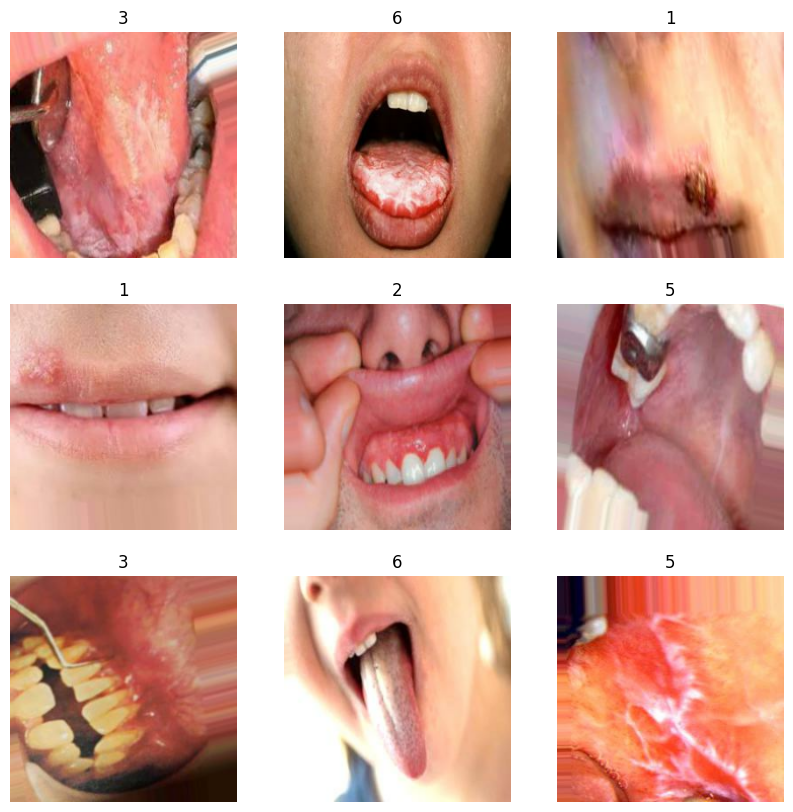

In [29]:


for images, labels in train_ds.take(1):
    plt.figure(figsize=(10,10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")


## Show distribution between Classes

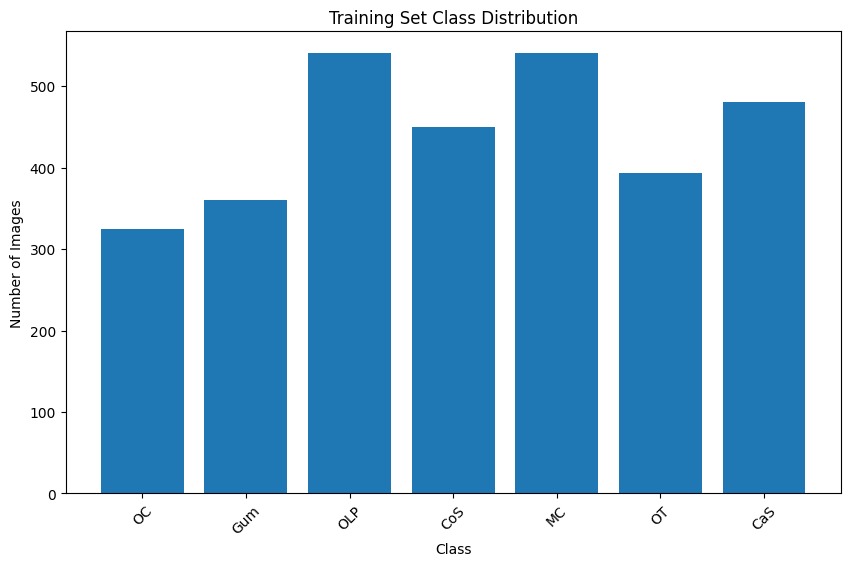

{'OC': 324, 'Gum': 360, 'OLP': 540, 'CoS': 450, 'MC': 540, 'OT': 393, 'CaS': 480}


In [ ]:
import os
import matplotlib.pyplot as plt

train_dir = r"D:\Cellula Technologies\Project 1\Python\Teeth_Dataset\Training"  # غير المسار عندك

classes = os.listdir(train_dir)
class_counts = [len(os.listdir(os.path.join(train_dir, c))) for c in classes]

plt.figure(figsize=(10,6))
plt.bar(classes, class_counts)
plt.title('Training Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

print(dict(zip(classes, class_counts)))


## Normalization & Augmentation

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam


IMG_SIZE = 224  
BATCH_SIZE = 32
DATA_DIR = 'D:\Cellula Technologies\Project 1\Python\Teeth_Dataset\Training'
val_dir="D:\Cellula Technologies\Project 1\Python\Teeth_Dataset\Validation"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    # fill_mode='nearest',
    # validation_split=0.2
)
train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    # subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    # subset='validation',
    shuffle=False
)

num_classes = train_generator.num_classes
print(f"عدد الفئات: {num_classes}")

Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
عدد الفئات: 7


## Build Model

In [32]:
from tensorflow import keras
from tensorflow.keras import layers
num_classes = 7
model = keras.Sequential([
    keras.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(256, 3, activation='relu'),  # Block جديد
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),      # زود عدد Neurons هنا كمان
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     9,437,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,859,655 (37.61 MB)

 Trainable params: 9,859,655 (37.61 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  
    metrics=['accuracy']
)


In [35]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=6,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stop]
)

Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.5042 - loss: 1.3286 - val_accuracy: 0.5272 - val_loss: 1.2602
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.5223 - loss: 1.2543 - val_accuracy: 0.5019 - val_loss: 1.3226
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.5284 - loss: 1.2738 - val_accuracy: 0.5856 - val_loss: 1.1601
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.5662 - loss: 1.1905 - val_accuracy: 0.5914 - val_loss: 1.0885
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.5855 - loss: 1.1273 - val_accuracy: 0.5798 - val_loss: 1.1648
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.5846 - loss: 1.1089 - val_accuracy: 0.6265 - val_loss: 1.0116
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.6136 - loss: 1.0769 - val_accuracy: 0.6556 - val_loss: 1.0005
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.6100 - loss: 1.0180 - val_accuracy: 0.6352 - v